In [115]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_file = pd.read_csv(city_data_to_load)
ride_file = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
file = pd.merge(ride_file,city_file)

# Display the data table for preview
file.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

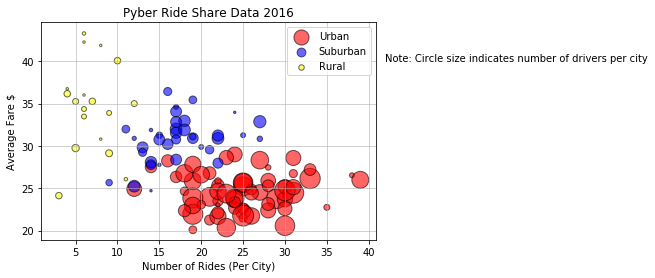

In [116]:
# Obtain the x and y coordinates for each of the three city types
Urban_file = file.loc[file['type']=='Urban']
Urban_grp = Urban_file.groupby(['city'])
Suburban_file = file.loc[file['type']=='Suburban']
Suburban_grp = Suburban_file.groupby(['city'])
Rural_file = file.loc[file['type']=='Rural']
Rural_grp = Rural_file.groupby(['city'])

avg_fare_urban = Urban_grp.fare.mean()
avg_fare_suburban = Suburban_grp.fare.mean()
avg_fare_rural = Rural_grp.fare.mean()

Urban_rides = Urban_grp.ride_id.nunique()
Suburban_rides = Suburban_grp.ride_id.nunique()
Rural_rides = Rural_grp.ride_id.nunique()

Urban_drivers = Urban_grp.driver_count.mean()
Suburban_drivers = Suburban_grp.driver_count.mean()
Rural_drivers = Rural_grp.driver_count.mean()

# Build the scatter plots for each city types
plt.scatter(Urban_rides,avg_fare_urban, s = (Urban_drivers*6), marker = 'o', color='red', alpha = .6, edgecolors='black')
plt.scatter(Suburban_rides,avg_fare_suburban, s=(Suburban_drivers*6),  marker = 'o', color='blue', alpha = .6, edgecolors='black')
plt.scatter(Rural_rides,avg_fare_rural,s =(Rural_drivers*6),  marker = 'o', color='yellow', alpha = .6, edgecolors='black')
    
# Incorporate the other graph properties
plt.title('Pyber Ride Share Data 2016')
plt.xlabel('Number of Rides (Per City)')
plt.ylabel('Average Fare $')
plt.grid(alpha=.7)

# Create a legend
plt.legend(['Urban','Suburban','Rural'])

# Incorporate a text label regarding circle size
plt.text(42,40,'Note: Circle size indicates number of drivers per city')

# Save Figure
plt.savefig('./Ride_Share_Bubble.png')
plt.show()

## Total Fares by City Type

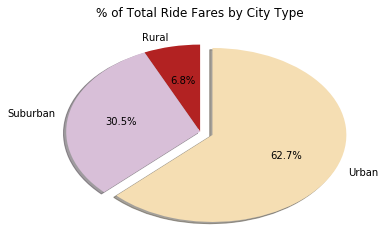

In [122]:
# Calculate Type Percents
City_type_sum = file.groupby(['type']).sum()
Data = City_type_sum['fare']
Data
# Build Pie Chart
plt.pie(Data, explode=(0,0,.1), labels=Data.index, autopct='%1.1f%%', colors=['firebrick','thistle','wheat'], shadow=True, startangle=90,)
plt.title('% of Total Ride Fares by City Type')
# Save Figure
plt.savefig('./FaresbyCityType.png')
plt.show()

## Total Rides by City Type

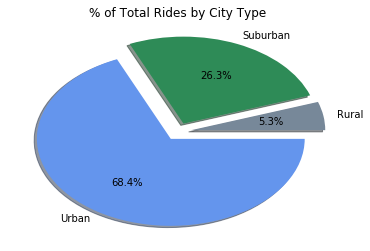

In [123]:
# Calculate Ride Percents
City_type_count = file.groupby(['type']).nunique()
Data2 = City_type_count['ride_id']
Data2
# Build Pie Chart
plt.pie(Data2, explode=(.1,.1,.1), labels=Data2.index,shadow=True, autopct='%1.1f%%',colors=['lightslategray','seagreen','cornflowerblue'] )
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('./RidesbyCityType.png')
plt.show()

## Total Drivers by City Type

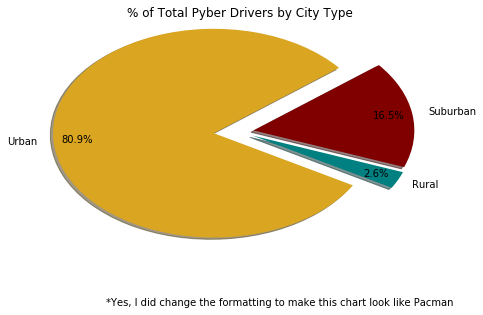

In [124]:
# Calculate Driver Percents
City_type_group = file.groupby(['type','city'])
Driver_count = City_type_group['driver_count'].first()
Driver_count2 = Driver_count.groupby(['type']).sum()
Driver_count2
# Build Pie Charts
plt.pie(Driver_count2,explode=(.1,.1,.2),startangle=-30,shadow=True,radius=1.2,pctdistance=.85,labels=Driver_count2.index, autopct='%1.1f%%',colors=['teal','maroon','goldenrod'])
plt.title('% of Total Pyber Drivers by City Type')
plt.text(-1,-2,'*Yes, I did change the formatting to make this chart look like Pacman')
# Save Figure
plt.savefig('./DriversbyCityType.png')
plt.show()